# 체육복
- source : [체육복](https://programmers.co.kr/learn/courses/30/lessons/42862)
- level : 1
- type : 그리디

## 문제 설명 
점심시간에 도둑이 들어, 일부 학생이 체육복을 도난당했습니다. 다행히 여벌 체육복이 있는 학생이 이들에게 체육복을 빌려주려 합니다. 학생들의 번호는 체격 순으로 매겨져 있어, 바로 앞번호의 학생이나 바로 뒷번호의 학생에게만 체육복을 빌려줄 수 있습니다. 예를 들어, 4번 학생은 3번 학생이나 5번 학생에게만 체육복을 빌려줄 수 있습니다. 체육복이 없으면 수업을 들을 수 없기 때문에 체육복을 적절히 빌려 최대한 많은 학생이 체육수업을 들어야 합니다.

전체 학생의 수 n, 체육복을 도난당한 학생들의 번호가 담긴 배열 lost, 여벌의 체육복을 가져온 학생들의 번호가 담긴 배열 reserve가 매개변수로 주어질 때, 체육수업을 들을 수 있는 학생의 최댓값을 return 하도록 solution 함수를 작성해주세요.

### 제한 사항
- 전체 학생의 수는 2명 이상 30명 이하입니다.
- 체육복을 도난당한 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
- 여벌의 체육복을 가져온 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
- 여벌 체육복이 있는 학생만 다른 학생에게 체육복을 빌려줄 수 있습니다.
- 여벌 체육복을 가져온 학생이 체육복을 도난당했을 수 있습니다. 이때 이 학생은 체육복을 하나만 도난당했다고 가정하며, 남은 체육복이 하나이기에 다른 학생에게는 체육복을 빌려줄 수 없습니다.

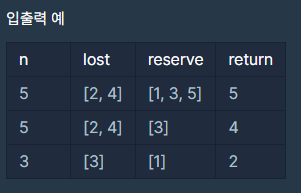

### 입출력 예 설명
- 예제 #1   
1번 학생이 2번 학생에게 체육복을 빌려주고, 3번 학생이나 5번 학생이 4번 학생에게 체육복을 빌려주면 학생 5명이 체육수업을 들을 수 있습니다.

- 예제 #2   
3번 학생이 2번 학생이나 4번 학생에게 체육복을 빌려주면 학생 4명이 체육수업을 들을 수 있습니다.



### pseudo code

1. reserve 원소의 앞(-1), 뒤(+1)를 계산하며 lost와 일치하는 경우 lost에서 뺀다. 
    1. n을 이용해 맨 앞 학생과 맨 뒤 학생은 앞 혹은 뒤만 계산한다.
2. n - lost에 남은 원소의 개수 = return 

In [32]:
print(sorted(final_dict['classic'], key=itemgetter(0), reverse=True))

[[800, 3], [500, 0], [150, 2]]


## 1st trial

In [14]:
def solution(n, lost, reserve):
    answer = 0
    
    for re_stu in reserve:
        print('re_stu :',re_stu)
        check_f = 0
        check_b = 0
        
        if re_stu == 1:
            check_f = 0
            check_b = re_stu + 1 
            
        elif re_stu == n:
            check_f = re_stu - 1
            check_b = 0
            
        else:
            check_f = re_stu - 1
            check_b = re_stu + 1 
        
        print(check_f)
        print(check_b)
        
        if check_f in lost:
            lost.remove(check_f)
            continue
        
        if check_b in lost:
            lost.remove(check_b)
            continue
    print(lost)
    
    answer = n - len(lost)
    
    return answer

In [15]:
solution(5, [2, 4], [1, 3, 5])

re_stu : 1
0
2
re_stu : 3
2
4
re_stu : 5
4
0
[]


5

1,2,3,7,12,18,20 에서 실패

## 2nd trial

In [17]:
def solution(genres, plays):
    from collections import defaultdict
    from operator import itemgetter
    answer = []
    genres_list = list(set(genres))
#     print(genres_list)
    genres_dict = defaultdict(int)           # int로 지정하면 0으로 기본값이 설정된다. 
#     genres_dict = defaultdict(lambda : 0)  #  lambda식을 이용해 기본값을 설정할 수 있다.
    

    for genre, play in zip(genres, plays):
#         print(genre, play)
        genres_dict[genre] += play
        
#     print('genres_dict :', genres_dict)
#     print(genres_dict.keys())
#     print(genres_dict.items())
    
#     print(genres_dict.itemgetter(0))
#     print(genres_dict.itemgetter(-1))
    
    sort_dict = sorted(genres_dict, key=(lambda x : x[1]), reverse=True) # 재생횟수가 많은 순서의 장르
    print('sort_dict :', sort_dict)
    
    final_dict = defaultdict(lambda : []) # key:장르, item: play, index 로 구성
    
    for idx, genre_play in enumerate(zip(genres, plays)):
        final_dict[genre_play[0]].append([genre_play[1], idx])
#     print('final_dict :', final_dict)
    
    for genre in sort_dict:
        one_genre = sorted(final_dict[genre], key=itemgetter(0), reverse=True)
#         print('one_genre :', one_genre)
        if len(one_genre) > 1:
            answer.append(one_genre[0][1])
            answer.append(one_genre[1][1])
        else:
            answer.append(one_genre[0][1])
        
    return answer

In [18]:
solution(["classic", "pop", "classic", "classic", "pop"],[500, 600, 150, 800, 2500])  # 답 : [4,1,3,0]

sort_dict : ['pop', 'classic']


[4, 1, 3, 0]

2nd case

In [19]:
solution(["classic", "pop", "classic", "classic", "classic", "classic"], [500, 1000, 400, 300, 200, 100])  # 답 : [0,2,1]

sort_dict : ['pop', 'classic']


[1, 0, 2]

왜...sorting이 제대로 안되는 걸까....왜..........

```
sort_dict = sorted(genres_dict, key=(lambda x : x[1]), reverse=True)
```

으로 하면 두 번째 케이스 정렬이 안된다.
이유가 무엇일까 ㅜㅜ 
items() 로 key, value를 정렬하니 성공!

In [11]:
def solution(genres, plays):
    from collections import defaultdict
    from operator import itemgetter
    answer = []
    genres_list = list(set(genres))
#     print(genres_list)
    genres_dict = defaultdict(int)           # int로 지정하면 0으로 기본값이 설정된다. 
#     genres_dict = defaultdict(lambda : 0)  #  lambda식을 이용해 기본값을 설정할 수 있다.
    

    for genre, play in zip(genres, plays):
#         print(genre, play)
        genres_dict[genre] += play
        
#     print('genres_dict :', genres_dict)
#     print(genres_dict.keys())
#     print(genres_dict.items())
    
#     print(genres_dict.itemgetter(0))
#     print(genres_dict.itemgetter(-1))
    
    sort_dict = sorted(genres_dict.items(), key=(lambda x : x[1]), reverse=True) # 재생횟수가 많은 순서의 장르
#     print('sort_dict :', sort_dict)
    
    final_dict = defaultdict(lambda : []) # key:장르, item: play, index 로 구성
    
    for idx, genre_play in enumerate(zip(genres, plays)):
        final_dict[genre_play[0]].append([genre_play[1], idx])
#     print('final_dict :', final_dict)
    
    for (genre, play) in sort_dict:
        one_genre = sorted(final_dict[genre], key=itemgetter(0), reverse=True)
#         print('one_genre :', one_genre)
        if len(one_genre) > 1:
            answer.append(one_genre[0][1])
            answer.append(one_genre[1][1])
        else:
            answer.append(one_genre[0][1])
        
    return answer

In [12]:
solution(["classic", "pop", "classic", "classic", "pop"],[500, 600, 150, 800, 2500])  # 답 : [4,1,3,0]

genres_dict : defaultdict(<class 'int'>, {'classic': 1450, 'pop': 3100})
dict_keys(['classic', 'pop'])
dict_items([('classic', 1450), ('pop', 3100)])
sort_dict : [('pop', 3100), ('classic', 1450)]
final_dict : defaultdict(<function solution.<locals>.<lambda> at 0x0000026E5E4C6708>, {'classic': [[500, 0], [150, 2], [800, 3]], 'pop': [[600, 1], [2500, 4]]})
one_genre : [[2500, 4], [600, 1]]
one_genre : [[800, 3], [500, 0], [150, 2]]


[4, 1, 3, 0]

2nd case

In [13]:
solution(["classic", "pop", "classic", "classic", "classic", "classic"], [500, 1000, 400, 300, 200, 100])  # 답 : [0,2,1]

genres_dict : defaultdict(<class 'int'>, {'classic': 1500, 'pop': 1000})
dict_keys(['classic', 'pop'])
dict_items([('classic', 1500), ('pop', 1000)])
sort_dict : [('classic', 1500), ('pop', 1000)]
final_dict : defaultdict(<function solution.<locals>.<lambda> at 0x0000026E5E4C6798>, {'classic': [[500, 0], [400, 2], [300, 3], [200, 4], [100, 5]], 'pop': [[1000, 1]]})
one_genre : [[500, 0], [400, 2], [300, 3], [200, 4], [100, 5]]
one_genre : [[1000, 1]]


[0, 2, 1]

- 문제만 봤을 때는 brown, yellow의 최대 공약수를 구하는 것인 줄 알았는데, 3번째 테스트 케이스를 해보니 최대 공약수 문제가 아니었다.
- 좀 더 여유있게 문제를 보고 고민하는 시간이 필요하다.